In [ ]:
from BayesianHoldem import BayesianHoldem
import torch

model = BayesianHoldem()

for i in range(10):
    card_representation = torch.randn(6, 13, 4)
    action_representation = torch.randn(24, 4, 4)
    prediction = model.predict_action(action_representation, card_representation)
    if prediction == 0:
        print(f"prediction {i}: Fold")
    elif prediction == 1:
        print(f"prediction {i}: Check/Call")
    elif prediction == 2:
        print(f"prediction {i}: Bet/Raise (BB)")
    elif prediction == 3:
        print(f"prediction {i}: All-in")

In [8]:
import pokerkit as pk

big_blind = 100
small_blind = 0.5*big_blind
blinds = [small_blind, big_blind]
ante = 0
min_bet = 0.5*big_blind
player_count = 2

P1_stack = 100*big_blind
P2_stack = 50*big_blind

game = pk.NoLimitTexasHoldem(
    # Automations - everything is automatic except for player actions
    (
        pk.Automation.ANTE_POSTING,
        pk.Automation.BET_COLLECTION,
        pk.Automation.BLIND_OR_STRADDLE_POSTING,
        pk.Automation.CARD_BURNING,
        pk.Automation.HOLE_DEALING,
        pk.Automation.BOARD_DEALING,
        pk.Automation.HOLE_CARDS_SHOWING_OR_MUCKING,
        pk.Automation.HAND_KILLING,
        pk.Automation.CHIPS_PUSHING,
        pk.Automation.CHIPS_PULLING,
    ),
    ante_trimming_status=True, # irrelevant but necessary for the game to be created
    raw_antes=ante,
    raw_blinds_or_straddles=blinds,
    min_bet=min_bet,
)

state = game(raw_starting_stacks=[P1_stack, P2_stack], player_count=player_count)
print(type(state))
print(f"Street index: {state.street_index}")
print(f"Stacks: {state.stacks}")

<class 'pokerkit.state.State'>
Street index: 0
Stacks: [9900, 4950.0]


In [158]:
import GameRepresentations
import importlib
importlib.reload(GameRepresentations)

raise_amount = 150
state.complete_bet_or_raise_to(raise_amount)
action_tensor = GameRepresentations.GameRepresentations.get_action_representations(state, torch.zeros((24, 4, 4)))
raise_amount += 150
state.complete_bet_or_raise_to(raise_amount)
action_tensor = GameRepresentations.GameRepresentations.get_action_representations(state, action_tensor)
raise_amount += 150
state.complete_bet_or_raise_to(raise_amount)
action_tensor = GameRepresentations.GameRepresentations.get_action_representations(state, action_tensor)
raise_amount += 150
state.complete_bet_or_raise_to(raise_amount)
action_tensor = GameRepresentations.GameRepresentations.get_action_representations(state, action_tensor)
raise_amount += 150
state.complete_bet_or_raise_to(raise_amount)
action_tensor = GameRepresentations.GameRepresentations.get_action_representations(state, action_tensor)
raise_amount += 150
state.complete_bet_or_raise_to(raise_amount)
action_tensor = GameRepresentations.GameRepresentations.get_action_representations(state, action_tensor)
raise_amount += 150
state.complete_bet_or_raise_to(raise_amount)
action_tensor = GameRepresentations.GameRepresentations.get_action_representations(state, action_tensor)
raise_amount += 150
state.complete_bet_or_raise_to(raise_amount)
action_tensor = GameRepresentations.GameRepresentations.get_action_representations(state, action_tensor)
raise_amount += 150
state.complete_bet_or_raise_to(raise_amount)
action_tensor = GameRepresentations.GameRepresentations.get_action_representations(state, action_tensor)
raise_amount += 150
state.complete_bet_or_raise_to(raise_amount)
action_tensor = GameRepresentations.GameRepresentations.get_action_representations(state, action_tensor)
raise_amount += 150
state.complete_bet_or_raise_to(raise_amount)
action_tensor = GameRepresentations.GameRepresentations.get_action_representations(state, action_tensor)
raise_amount += 150
state.complete_bet_or_raise_to(raise_amount)
action_tensor = GameRepresentations.GameRepresentations.get_action_representations(state, action_tensor)
raise_amount += 150
state.complete_bet_or_raise_to(raise_amount)
action_tensor = GameRepresentations.GameRepresentations.get_action_representations(state, action_tensor)
print(action_tensor)

tensor([[[0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 0., 2., 0.],
         [1., 1., 1., 1.]],

        [[0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 0., 2., 0.],
         [1., 1., 1., 1.]],

        [[0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 0., 2., 0.],
         [1., 1., 1., 1.]],

        [[0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 0., 2., 0.],
         [1., 1., 1., 1.]],

        [[0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 0., 2., 0.],
         [1., 1., 1., 1.]],

        [[0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 0., 2., 0.],
         [1., 1., 1., 1.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[

In [ ]:
import GameRepresentations
import importlib
importlib.reload(GameRepresentations)

state.check_or_call()
action_tensor = GameRepresentations.GameRepresentations.get_action_representations(state, torch.zeros((24, 4, 4)))
state.check_or_call()
action_tensor = GameRepresentations.GameRepresentations.get_action_representations(state, action_tensor)
state.check_or_call()
action_tensor = GameRepresentations.GameRepresentations.get_action_representations(state, action_tensor)
state.complete_bet_or_raise_to(150)
action_tensor = GameRepresentations.GameRepresentations.get_action_representations(state, action_tensor)
state.complete_bet_or_raise_to(300)
action_tensor = GameRepresentations.GameRepresentations.get_action_representations(state, action_tensor)
state.complete_bet_or_raise_to(450)
action_tensor = GameRepresentations.GameRepresentations.get_action_representations(state, action_tensor)
state.check_or_call()
action_tensor = GameRepresentations.GameRepresentations.get_action_representations(state, action_tensor)
state.check_or_call()
action_tensor = GameRepresentations.GameRepresentations.get_action_representations(state, action_tensor)
state.complete_bet_or_raise_to(state.stacks[state.actor_index] + state.bets[state.actor_index])
action_tensor = GameRepresentations.GameRepresentations.get_action_representations(state, action_tensor)
print(action_tensor)


tensor([[[0., 1., 0., 0.],
         [0., 1., 0., 0.],
         [0., 2., 0., 0.],
         [0., 1., 1., 1.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 1., 1., 0.],
         [1., 1., 1., 1.]],

        [[0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 0., 2., 0.],
         [1., 1., 1., 1.]],

        [[0., 1., 0., 0.],
         [0., 0., 0., 0.],
         [0., 1., 0., 0.],
         [1., 1., 1., 1.]],

        [[

In [ ]:

import GameRepresentations
import importlib
importlib.reload(GameRepresentations)

state.check_or_call()
state.complete_bet_or_raise_to(150)
print(state.street_index)
action_tensor = GameRepresentations.GameRepresentations.get_action_representations(state, torch.zeros((24, 4, 4)))

state.complete_bet_or_raise_to(200)
state.complete_bet_or_raise_to(250)
print(state.street_index)
action_tensor = GameRepresentations.GameRepresentations.get_action_representations(state, action_tensor)

state.check_or_call()
state.complete_bet_or_raise_to(150)
state.check_or_call()
print(state.street_index)
action_tensor = GameRepresentations.GameRepresentations.get_action_representations(state, action_tensor)

print(action_tensor)

In [11]:
import GameRepresentations
import importlib
importlib.reload(GameRepresentations)
state.check_or_call()
state.check_or_call()
action_tensor = GameRepresentations.GameRepresentations.get_card_representations(state, 0)
print(action_tensor)
print(state.hole_cards[0])
print(state.board_cards)

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [ ]:
print(type(state.operations[-1]))
state.check_or_call()
state.check_or_call()
print(type(state.operations[-1]))
state.complete_bet_or_raise_to(500)
state.fold()
print(type(state.operations[-1]))
print(tuple(state.pot_amounts)[0])
print(state.board_cards)
print(state.hole_cards)
print(state.operations)

In [ ]:
print(f"Bets: {state.bets}")
print(f"Stacks: {state.stacks}")
print(f"Actor indices: {state.actor_indices}")


state.complete_bet_or_raise_to(state.stacks[state.actor_index] + state.bets[state.actor_index])
print(f"All in")
print(f"Bets: {state.bets}")
print(f"Stacks: {state.stacks}")
print(f"Actor indices: {state.actor_indices}")

state.check_or_call()
print("Check or call")
print(f"Bets: {state.bets}")
print(f"Stacks: {state.stacks}")
print(f"Actor indices: {state.actor_indices}")

print(f"Street index: {state.street_index}")

In [ ]:
# Test self-play

from SelfPlayPokerGame import SelfPlayPokerGame

game = SelfPlayPokerGame()

for i in range(10):
    print(f"===============")
    print(f" New Game {i+1}")
    print("===============")
    game.run_game(verbose=True, training=False)

In [1]:
import torch

if torch.cuda.is_available():
    print("CUDA is enabled. Number of GPUs:", torch.cuda.device_count())
else:
    print("CUDA is not available.")

CUDA is enabled. Number of GPUs: 1


In [9]:
# Test training
import VanillaSelfPlayPokerGame
import importlib
importlib.reload(VanillaSelfPlayPokerGame)
from datetime import timedelta

from VanillaSelfPlayPokerGame import VanillaSelfPlayPokerGame
import os

game = VanillaSelfPlayPokerGame()

save_path = "data/models/test"
os.makedirs(save_path, exist_ok=True)

training_stats = game.train_for_duration(duration=timedelta(minutes=10), games_per_session=200, save_path=save_path)


========= Starting Training Session 1 =========
Time remaining: 0:10:00


Training Games:  16%|█▌        | 31/200 [00:05<00:28,  5.93game/s]


KeyboardInterrupt: 

In [ ]:
# Test training
import SelfPlayPokerGame
import PolyakSelfPlayPokerGame
import BayesianHoldem
import importlib
importlib.reload(BayesianHoldem)
importlib.reload(SelfPlayPokerGame)
importlib.reload(PolyakSelfPlayPokerGame)
from datetime import timedelta

from PolyakSelfPlayPokerGame import PolyakSelfPlayPokerGame
import os

game = PolyakSelfPlayPokerGame()

save_path = "data/models/train_run_1"
plot_path = save_path + "plots"
os.makedirs(save_path, exist_ok=True)

training_stats = game.train_for_duration(duration=timedelta(hours=36), games_per_session=250, save_path=save_path)

Training Games:   0%|          | 2/500 [00:00<00:30, 16.13game/s]

Exploration rate: 1.0000


Training Games: 100%|██████████| 500/500 [01:02<00:00,  8.06game/s]


Saved new best win rate model: 0.4840 with Elo: 954.8
Saved new best BB/hand model: -2.5889 with Elo: 954.8
Saved new best Elo model: 954.8


Training Games: 100%|██████████| 500/500 [01:04<00:00,  7.74game/s]


Saved new best win rate model: 0.4910 with Elo: 974.7
Saved new best BB/hand model: -2.3091 with Elo: 974.7
Saved new best Elo model: 974.7


Training Games:  74%|███████▍  | 371/500 [00:41<00:16,  7.86game/s]

Exploration rate: 0.9512


Training Games: 100%|██████████| 500/500 [00:56<00:00,  8.89game/s]


Saved new best win rate model: 0.4953 with Elo: 1003.6
Saved new best BB/hand model: -1.7511 with Elo: 1003.6
Saved new best Elo model: 1003.6


Training Games: 100%|██████████| 500/500 [01:07<00:00,  7.42game/s]



Loading best elo model as Player1
Updated Player1 Elo rating to: 1003.6


Training Games: 100%|██████████| 500/500 [01:07<00:00,  7.39game/s]


Saved new best BB/hand model: -1.7354 with Elo: 989.0


Training Games: 100%|██████████| 500/500 [01:14<00:00,  6.74game/s]


Saved new best BB/hand model: -1.2974 with Elo: 929.6


Training Games: 100%|██████████| 500/500 [01:49<00:00,  4.55game/s]


Saved new best win rate model: 0.5011 with Elo: 1025.7
Saved new best BB/hand model: -0.8567 with Elo: 1025.7
Saved new best Elo model: 1025.7


Training Games:   1%|          | 6/500 [00:00<00:56,  8.68game/s]

Exploration rate: 0.8607


Training Games: 100%|██████████| 500/500 [01:17<00:00,  6.44game/s]


Saved new best win rate model: 0.5012 with Elo: 952.3
Saved new best BB/hand model: -0.5593 with Elo: 952.3


Training Games:  84%|████████▍ | 420/500 [01:25<00:09,  8.51game/s]

Exploration rate: 0.8187


Training Games: 100%|██████████| 500/500 [01:35<00:00,  5.22game/s]


Saved new best win rate model: 0.5064 with Elo: 1004.4
Saved new best BB/hand model: -0.0257 with Elo: 1004.4
========= Starting Training Session 10, time remaining: 1 day, 11:48:32.904358 =========

Loading best elo model as Player1
Updated Player1 Elo rating to: 1025.7


Training Games:  50%|████▉     | 249/500 [02:14<21:55,  5.24s/game]

Exploration rate: 0.7788


Training Games:  56%|█████▌    | 280/500 [04:42<19:22,  5.28s/game]

Exploration rate: 0.7408


Training Games:  63%|██████▎   | 313/500 [07:05<08:41,  2.79s/game]

Exploration rate: 0.7047


Training Games:  69%|██████▊   | 343/500 [09:30<12:53,  4.93s/game]

Exploration rate: 0.6703


Training Games:  79%|███████▊  | 393/500 [13:53<09:26,  5.30s/game]

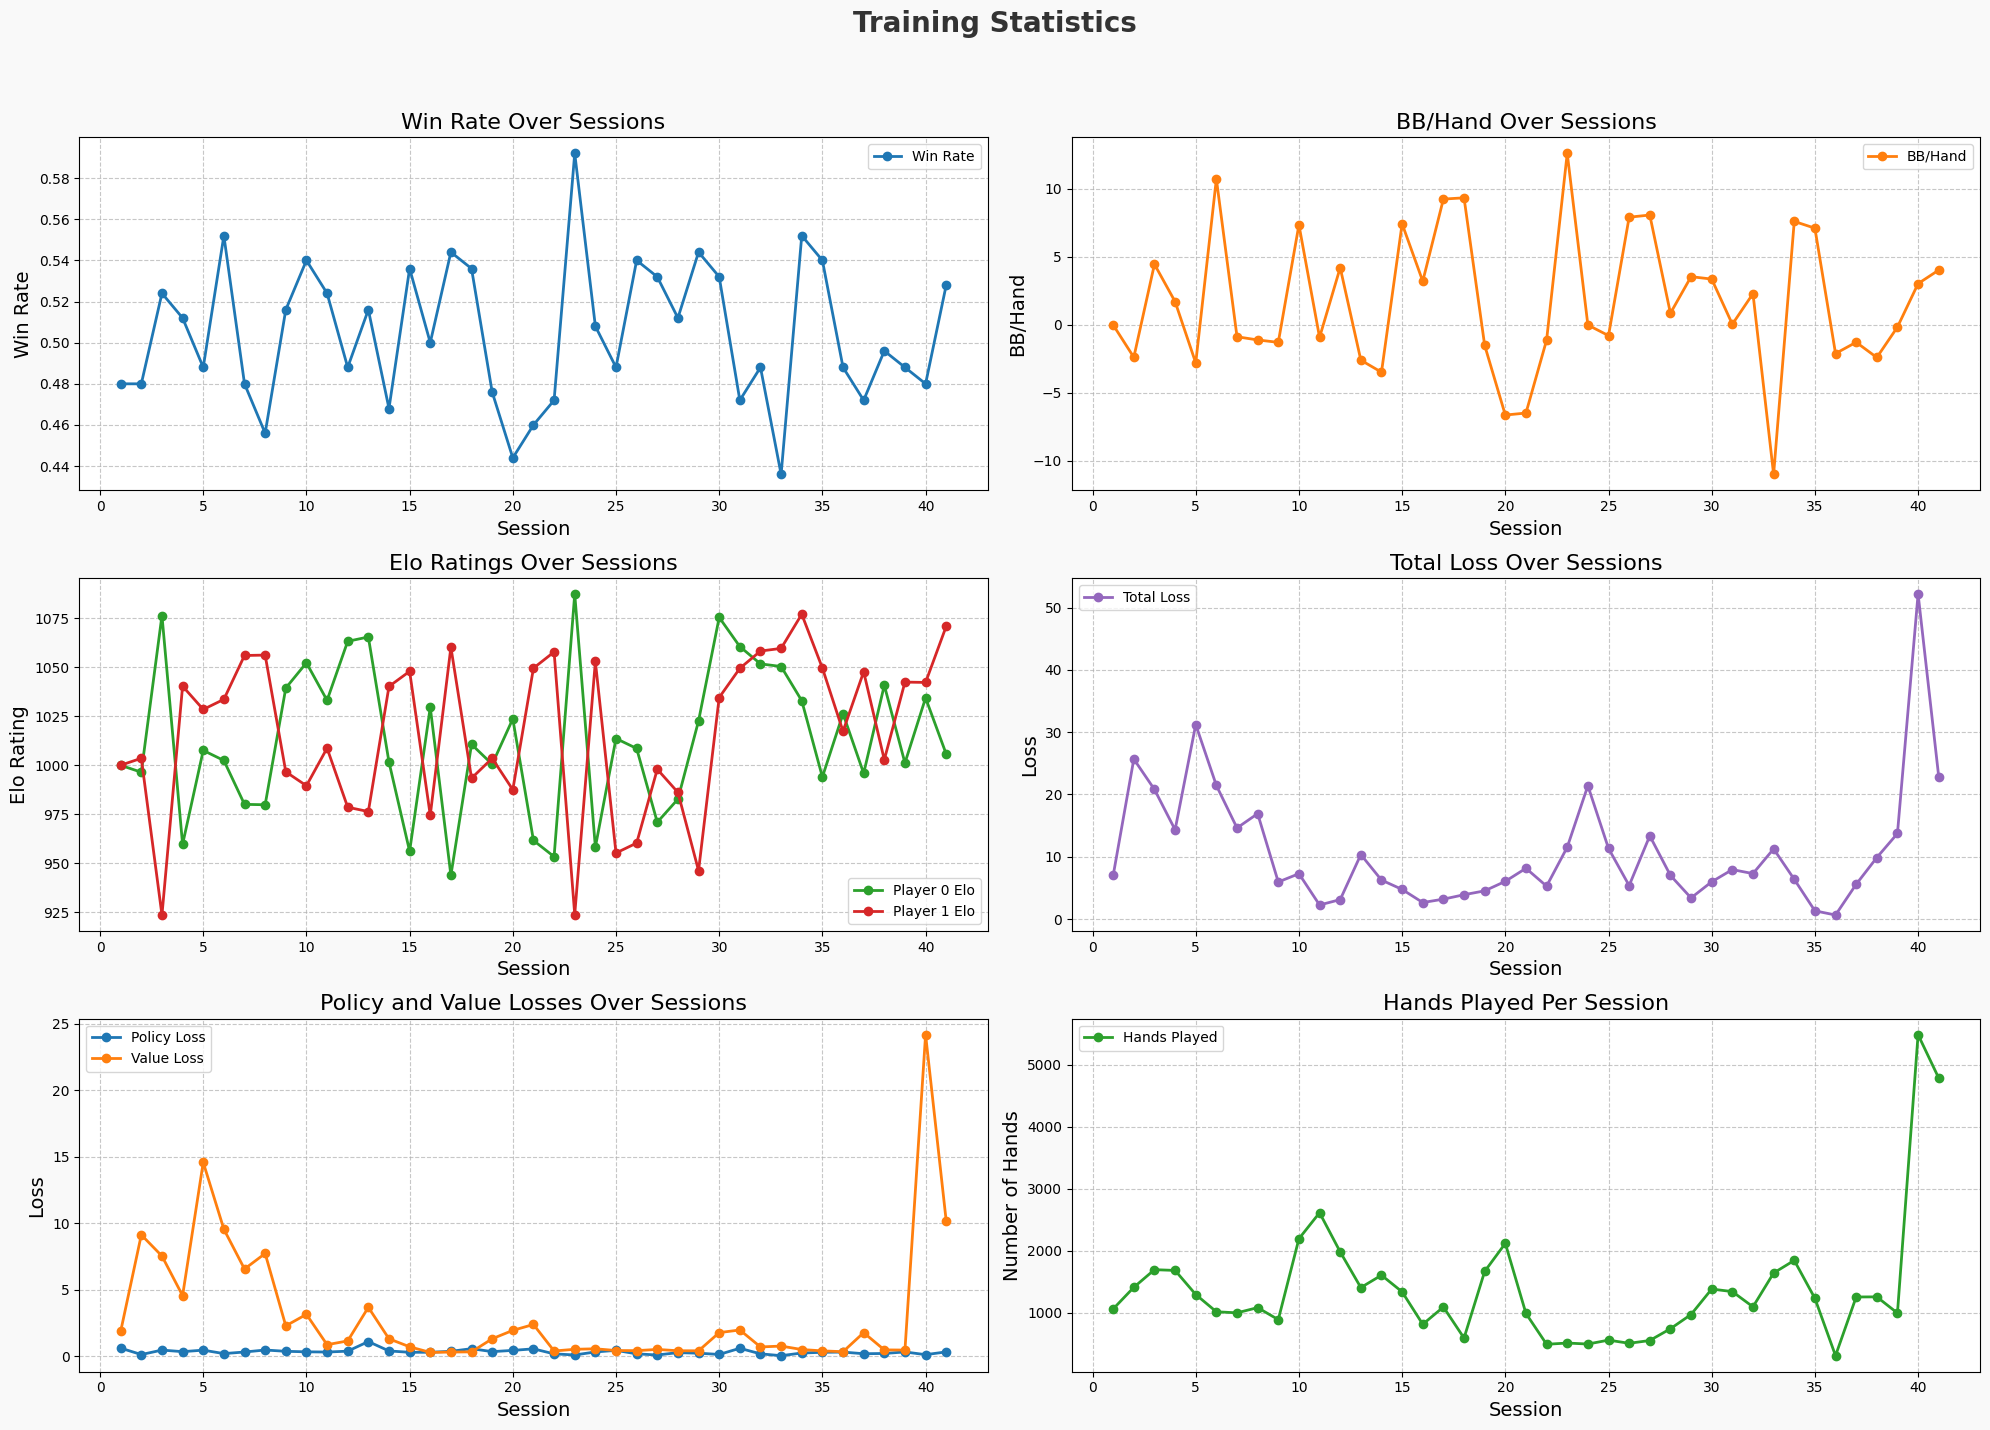

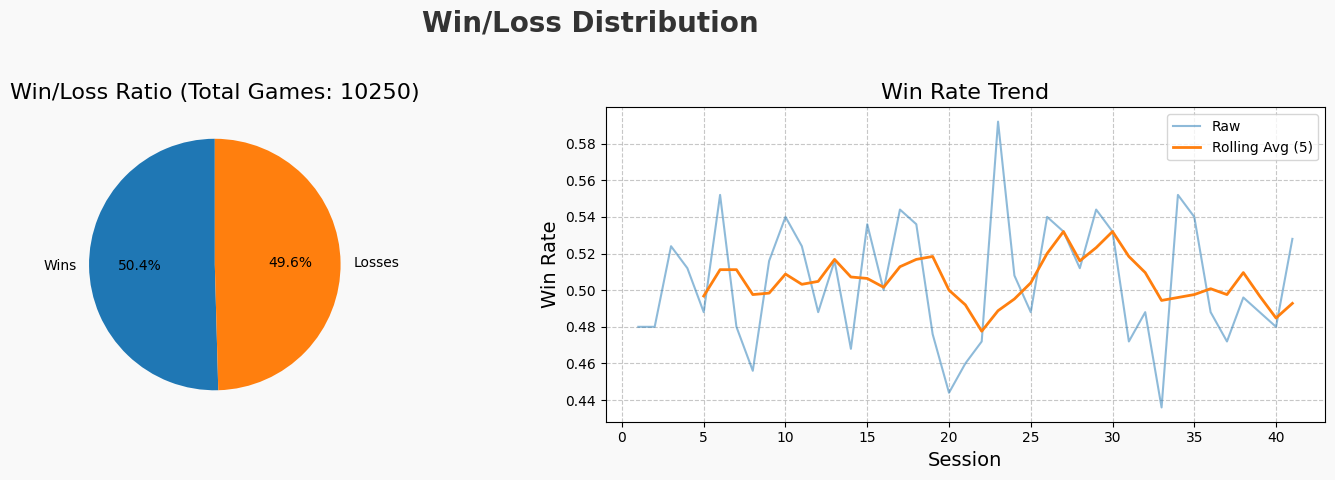

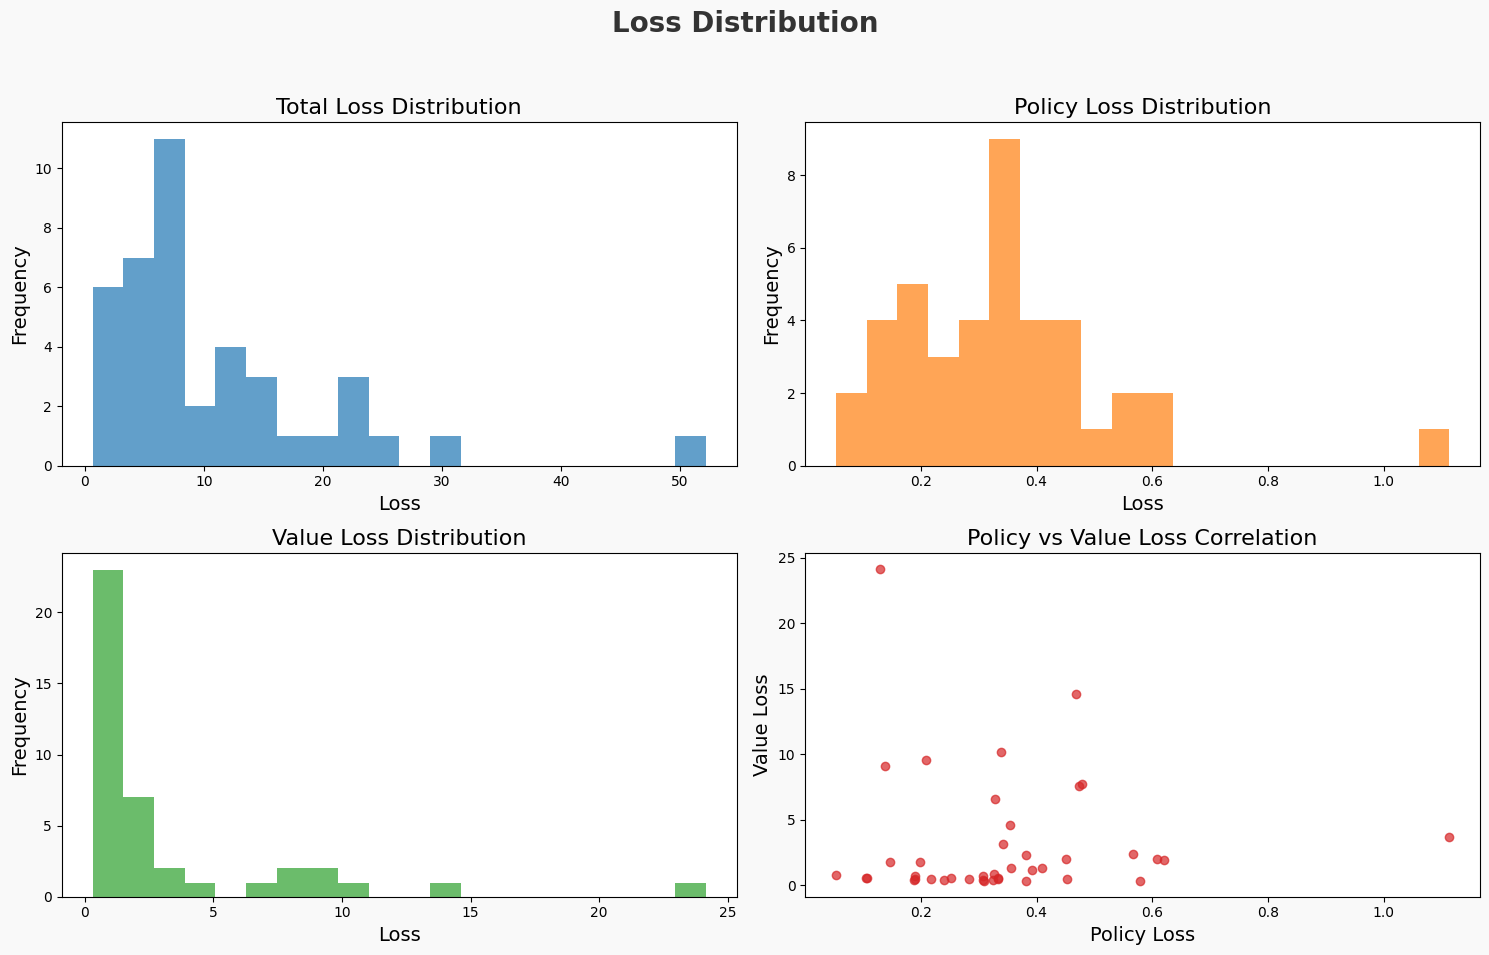

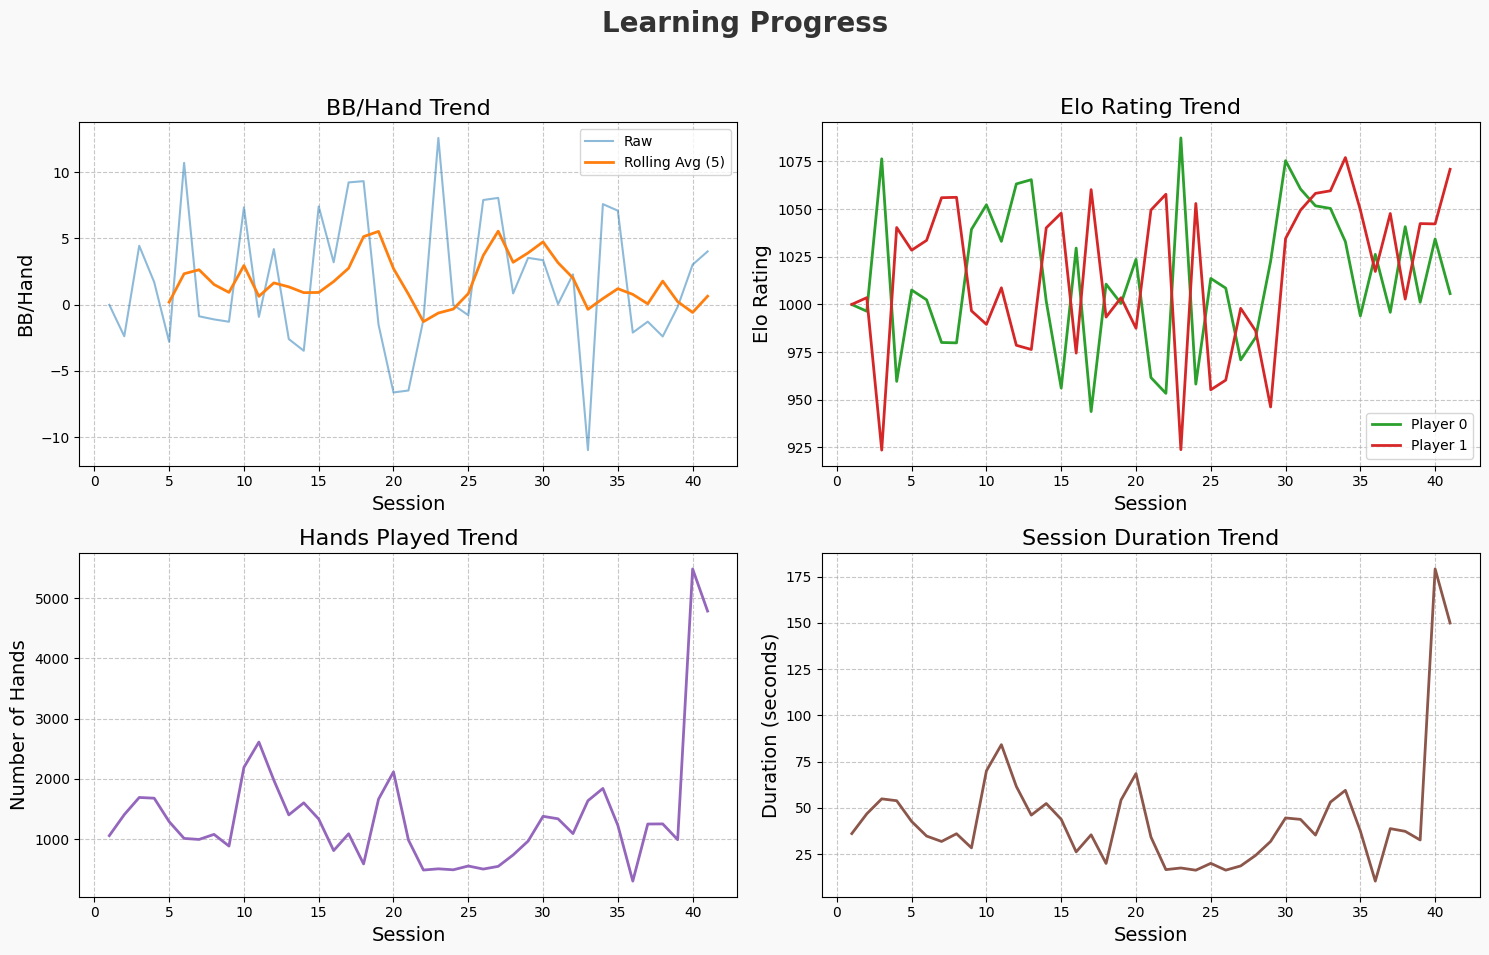

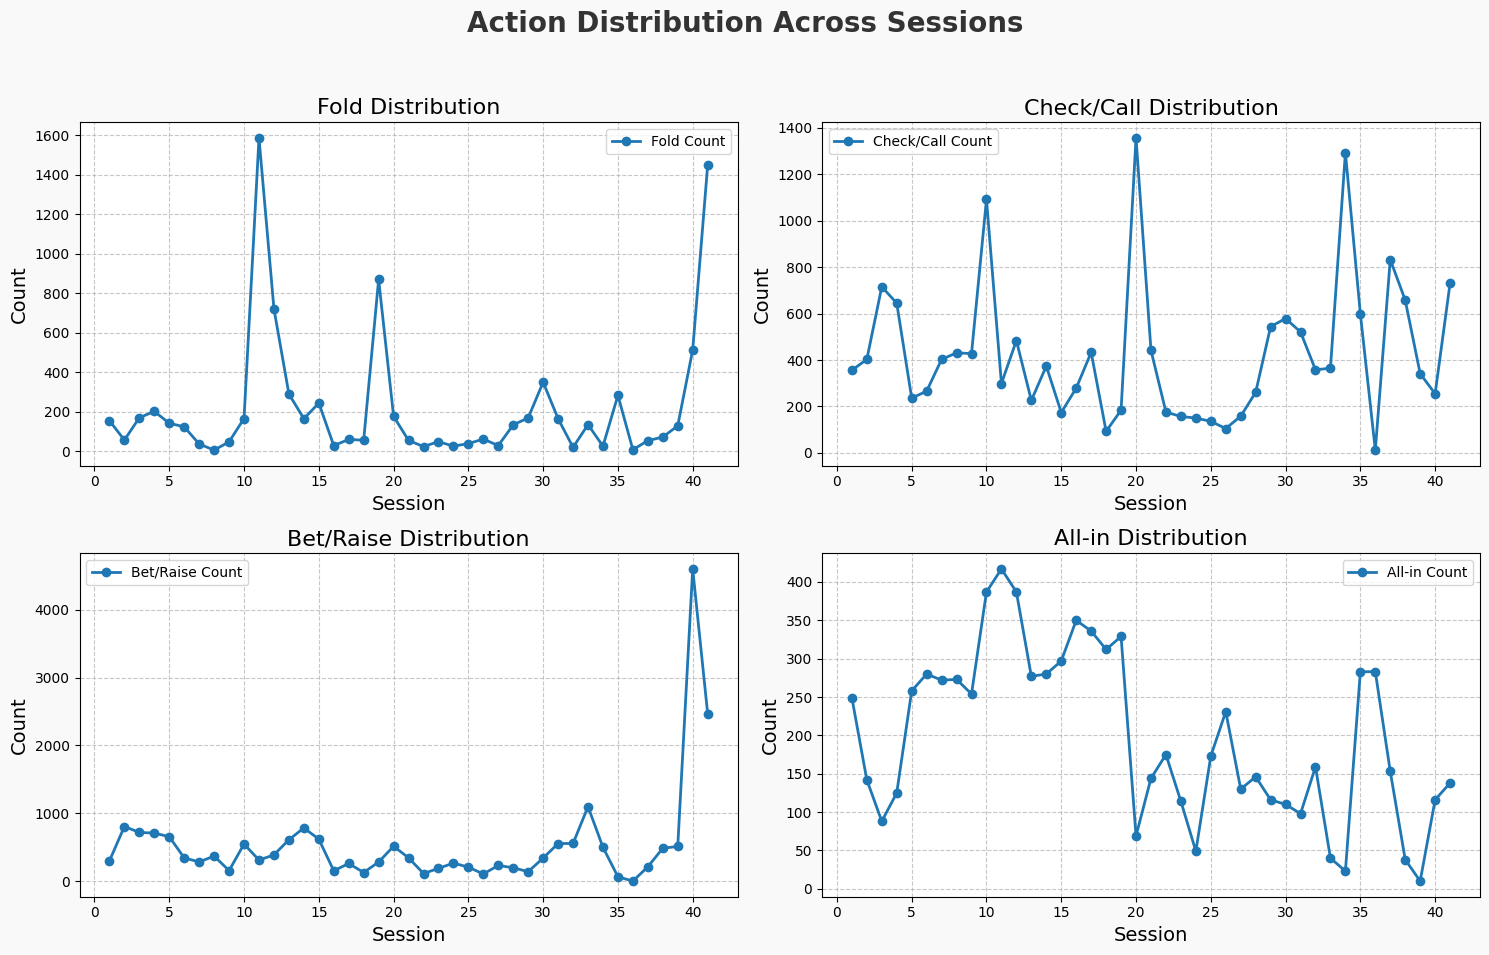

In [22]:
from importlib import reload

import utilities
reload(utilities)
from utilities import Utilities


Utilities.plot_all_stats(training_stats, save_dir=save_path)

In [ ]:
print(training_stats)